In [24]:
%cd '/Users/yannickflores/Perso Project/foreshadownba/foreshadownba-dashboard-monitoring'

/Users/yannickflores/Perso Project/foreshadownba/foreshadownba-dashboard-monitoring


/Users/yannickflores/Library/Caches/pypoetry/virtualenvs/foreshadwownba-dashboard-monitoring-fyl18zkQ-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dashboard/nba_games_inseasonn_w_pred.csv")
df = df[['id',	'id_season',	'game_date',	'tm',	'opp',	'results',	'prediction_value']]
df['row_accuracy'] = np.where(df['results'] == df['prediction_value'], 1, 0)
df[df['tm']=='MIA']

,id,id_season,game_date,tm,opp,results,prediction_value,row_accuracy
391,2024-10-30_NYK_MIA,2025,2024-10-30,MIA,NYK,0,1,0
392,2024-11-02_MIA_WAS,2025,2024-11-02,MIA,WAS,1,1,1
393,2024-11-04_SAC_MIA,2025,2024-11-04,MIA,SAC,0,1,0
394,2024-11-06_MIA_PHO,2025,2024-11-06,MIA,PHO,0,0,1
395,2024-11-10_MIA_MIN,2025,2024-11-10,MIA,MIN,1,0,0
396,2024-11-18_PHI_MIA,2025,2024-11-18,MIA,PHI,1,1,1
397,2024-11-26_MIL_MIA,2025,2024-11-26,MIA,MIL,0,1,0
398,2024-11-29_TOR_MIA,2025,2024-11-29,MIA,TOR,1,1,1
399,2024-12-01_MIA_TOR,2025,2024-12-01,MIA,TOR,0,1,0
400,2024-12-07_PHO_MIA,2025,2024-12-07,MIA,PHO,1,1,1


## Accuracy per day
### First object thst we will display

In [26]:
# Convert 'game_date' to datetime
df['game_date'] = pd.to_datetime(df['game_date'])

# Perform the aggregation
daily_accuracy = df.groupby('game_date').agg(
    row_count=('id', 'count'),
    sum_row_accuracy=('row_accuracy', 'sum')
).reset_index()

daily_accuracy['daily_accuracy'] = daily_accuracy['sum_row_accuracy'] / daily_accuracy['row_count']

# Print the result
print(daily_accuracy)

    game_date  row_count  sum_row_accuracy  daily_accuracy
0  2024-10-24          2                 2        1.000000
1  2024-10-25         10                 6        0.600000
2  2024-10-26         10                 7        0.700000
3  2024-10-27          5                 2        0.400000
4  2024-10-28         11                 8        0.727273
..        ...        ...               ...             ...
64 2025-01-01          8                 5        0.625000
65 2025-01-02          6                 4        0.666667
66 2025-01-03          9                 6        0.666667
67 2025-01-04          9                 3        0.333333
68 2025-01-05          6                 3        0.500000

[69 rows x 4 columns]


# Accuracy for the current season
## Second object

In [27]:
# Convert 'game_date' to datetime

# Perform the aggregation
season_accuracy = df.groupby('id_season').agg(
    row_count=('id', 'count'),
    sum_row_accuracy=('row_accuracy', 'sum')
).reset_index()

season_accuracy['season_accuracy'] = season_accuracy['sum_row_accuracy'] / season_accuracy['row_count']

# Print the result
print(season_accuracy)

   id_season  row_count  sum_row_accuracy  season_accuracy
0       2025        508               335         0.659449


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


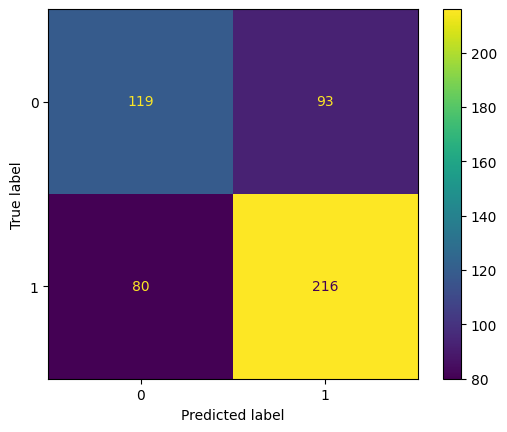

In [29]:

cm = confusion_matrix(
    df['results'], df['prediction_value']
    )

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm
    )

disp.plot()
plt.show()